In [37]:
# Import libaries
from ema_workbench import Model, RealParameter, IntegerParameter, ScalarOutcome, ema_logging, perform_experiments
from ema_workbench.analysis import feature_scoring

import seaborn as sns
import matplotlib.pyplot as plt

# Import model from model.py
from model import AdaptationModel

In [31]:
# Define function to run model and return outcomes
def run_model(probability_of_network_connection, number_of_edges, number_of_nearest_neighbours):
    model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz", 
                            probability_of_network_connection=probability_of_network_connection,
                            number_of_edges=number_of_edges,
                            number_of_nearest_neighbours=number_of_nearest_neighbours)
    for step in range(20):
        model.step()
    
    model_data = model.datacollector.get_model_vars_dataframe()
    model_data_final = model_data.iloc[-1]["total_adapted_households"]  # get the value from the 'total_adapted_households' column of the last row

    return {"model_data_final": model_data_final}

In [32]:
ema_logging.LOG_FORMAT = "[%(name)s/%(levelname)s/%(processName)s] %(message)s"
ema_logging.log_to_stderr(ema_logging.INFO)

model = Model("ABModel", function=run_model)  # instantiate the model

# specify uncertainties
model.uncertainties = [
    RealParameter("probability_of_network_connection", 0.3, 0.5),
    IntegerParameter("number_of_edges", 2, 4),
    IntegerParameter("number_of_nearest_neighbours", 4, 6),
]

# specify outcomes
model.outcomes = [ScalarOutcome("model_data_final")]

results = perform_experiments(model, 10)
results

[EMA.ema_workbench.em_framework.evaluators/INFO/MainProcess] performing 10 scenarios * 1 policies * 1 model(s) = 10 experiments







[EMA.ema_workbench.em_framework.evaluators/INFO/MainProcess] performing experiments sequentially





















100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 24.80it/s]
[EMA.ema_workbench.em_framework.evaluators/INFO/MainProcess] experiments finished


(   number_of_edges  number_of_nearest_neighbours  \
 0                3                             5   
 1                2                             5   
 2                3                             6   
 3                2                             4   
 4                3                             5   
 5                2                             4   
 6                4                             6   
 7                4                             4   
 8                4                             6   
 9                3                             6   
 
    probability_of_network_connection scenario policy    model  
 0                           0.454863     1120   None  ABModel  
 1                           0.487043     1121   None  ABModel  
 2                           0.315158     1122   None  ABModel  
 3                           0.462644     1123   None  ABModel  
 4                           0.355999     1124   None  ABModel  
 5                       

In [33]:
experiments, outcomes = results
print(experiments.shape)
print(list(outcomes.keys()))

(10, 6)
['model_data_final']


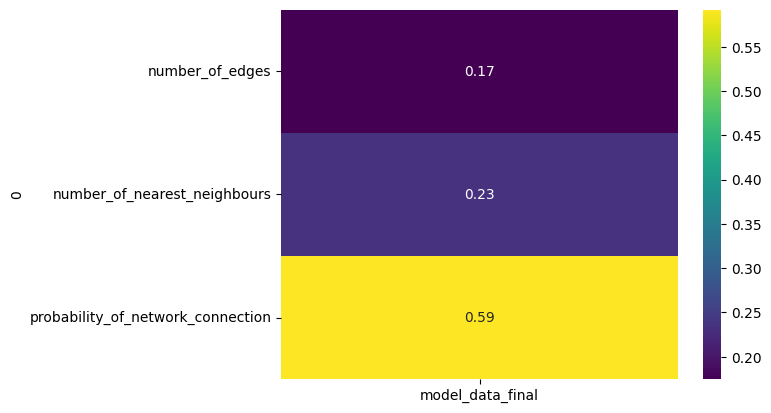

In [42]:
x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()
# do not show this to the reader, put it in the appendix
# rather dive into one specific sensitivity